# Big Dive - Project Work Finale

## Applicazione Machine Learning

- Angelica Castellano
- Giuseppe D'Agostino
- Stefania Piosso
- Marco Vita

Import librerie:

In [619]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [620]:
import pandas as pd

Importo il dataset di training:

In [621]:
db_train = pd.read_csv('CONTEST_TRAINING_SET_PUBBLICO.CSV')

In [622]:
db_train.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013.0,AV,1977.0,243,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131.0,SA,1984.0,614,492,4719.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030.0,BN,1952.0,12,430,11021.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133.0,NaN,1982.0,830,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021.0,BR,1989.0,419,482,10711.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


E' necessaria la definizione dei formati per visualizzare e trattare correttamente i valori:

In [623]:
db_train=pd.read_csv('CONTEST_TRAINING_SET_PUBBLICO.CSV',
               dtype={'COD_CAP': object,
                      'COD_PROVINCIA': object,
                      'DAT_COSTITUZIONE': object,
                      'COD_RAE': object,
                      'COD_SAE': object,
                      'COD_ISTAT_ATECO_07': object,
                      'FLAG_DEF_6M': np.int,
                      'CBI201312_CREDITI': np.float64,
                      'CBI201312_UTILE_PERDITA_ESERCIZIO':np.float64,
                      'CBI201312_PATRIMONIO_NETTO':np.float64,
                      'CBI201312_DEBITI_CONSOLIDATI':np.float64,
                      'CBI201312_DEBITI_ENTRO_ES_SUCC':np.float64,
                      'CBI201312_RICAVI_NETTI':np.float64,
                      'CBI201312_ACQUISTI_NETTI':np.float64,
                      'CBI201312_COSTI_SERVZ_BENI_TERZI':np.float64,
                      'IMP_ACCORDATO':np.float64,
                      'IMP_UTILIZZATO':np.float64,
                      'IMP_VALORE_GARANZIA':np.float64})

Applico la stessa formattazione anche ai campi dei dataset di test:

In [624]:
db_test=pd.read_csv('CONTEST_TEST_SET_PUBBLICO.csv',
               dtype={'COD_CAP': object,
                      'COD_PROVINCIA': object,
                      'DAT_COSTITUZIONE': object,
                      'COD_RAE': object,
                      'COD_SAE': object,
                      'COD_ISTAT_ATECO_07': object,
                      'FLAG_DEF_6M': np.int,
                      'CBI201312_CREDITI': np.float64,
                      'CBI201312_UTILE_PERDITA_ESERCIZIO':np.float64,
                      'CBI201312_PATRIMONIO_NETTO':np.float64,
                      'CBI201312_DEBITI_CONSOLIDATI':np.float64,
                      'CBI201312_DEBITI_ENTRO_ES_SUCC':np.float64,
                      'CBI201312_RICAVI_NETTI':np.float64,
                      'CBI201312_ACQUISTI_NETTI':np.float64,
                      'CBI201312_COSTI_SERVZ_BENI_TERZI':np.float64,
                      'IMP_ACCORDATO':np.float64,
                      'IMP_UTILIZZATO':np.float64,
                      'IMP_VALORE_GARANZIA':np.float64})

In [625]:
db_train.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013,AV,1977.0,243,430,4120,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131,SA,1984.0,614,492,4719,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030,BN,1952.0,012,430,11021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133,NaN,1982.0,830,430,4120,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021,BR,1989.0,419,482,10711,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


In [626]:
db_test.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,66812,16033,GE,1977.0,830,482,63111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59982.0,59982.0,0.0
1,66813,10090,TO,1985.0,345,492,2612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388785.0,391500.0,0.0
2,66814,34170,GO,1921.0,648,492,47521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213293.0,211445.0,0.0
3,66815,35044,PD,1993.0,467,482,3109,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,374537.0,0.0
4,66816,11017,AO,1975.0,505,482,4120,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,0.0,0.0


Normalizzo i valori di DAT_COSTITUZIONE e CODICE ATECO e li sostituisco al dataset originale:

In [627]:
DT_COSTITUZIONE = db_train['DAT_COSTITUZIONE'].str[0:4]
ATECO = db_train['COD_ISTAT_ATECO_07'].str[0:2]

In [628]:
DTEST_COSTITUZIONE = db_test['DAT_COSTITUZIONE'].str[0:4]
ATECO_TEST = db_test['COD_ISTAT_ATECO_07'].str[0:2]

In [629]:
DT_COSTITUZIONE.head()

0    1977
1    1984
2    1952
3    1982
4    1989
Name: DAT_COSTITUZIONE, dtype: object

In [630]:
DTEST_COSTITUZIONE.head()

0    1977
1    1985
2    1921
3    1993
4    1975
Name: DAT_COSTITUZIONE, dtype: object

In [631]:
ATECO.head()

0    41
1    47
2    11
3    41
4    10
Name: COD_ISTAT_ATECO_07, dtype: object

In [632]:
ATECO_TEST.head()

0    63
1    26
2    47
3    31
4    41
Name: COD_ISTAT_ATECO_07, dtype: object

In [633]:
db_train['DAT_COSTITUZIONE']=DT_COSTITUZIONE
db_train['COD_ISTAT_ATECO_07']=ATECO

In [634]:
db_test['DAT_COSTITUZIONE']=DTEST_COSTITUZIONE
db_test['COD_ISTAT_ATECO_07']=ATECO_TEST

In [635]:
db_train.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013,AV,1977,243,430,41,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131,SA,1984,614,492,47,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030,BN,1952,012,430,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133,NaN,1982,830,430,41,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021,BR,1989,419,482,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


In [636]:
db_test.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,66812,16033,GE,1977,830,482,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59982.0,59982.0,0.0
1,66813,10090,TO,1985,345,492,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388785.0,391500.0,0.0
2,66814,34170,GO,1921,648,492,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213293.0,211445.0,0.0
3,66815,35044,PD,1993,467,482,31,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,374537.0,0.0
4,66816,11017,AO,1975,505,482,41,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,0.0,0.0


Visualizzo una tabella di statistiche descrittive sul dataset di trainng:

In [637]:
db_train.describe()

,ID,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
count,66811.000000,66811.000000,57571.000000,53997.000000,53997.000000,57571.000000,5.757100e+04,5.399700e+04,5.399700e+04,57571.00000,6.681100e+04,6.681100e+04,6.681100e+04
mean,33406.000000,0.165572,454.488110,9.194326,289.402078,262.123604,6.803398e+02,1.227074e+03,5.660812e+02,315.62502,7.000651e+05,5.541229e+05,1.381665e+05
std,19286.818754,0.371698,2935.871352,275.938893,1505.764856,789.671069,5.140208e+03,6.730968e+03,7.762285e+03,766.03980,1.989887e+06,1.843194e+06,8.336413e+06
min,1.000000,0.000000,0.000000,-18087.000000,-29509.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00
25%,16703.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040000e+05,6.728100e+04,0.000000e+00
50%,33406.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.040000e+05,2.131320e+05,0.000000e+00
75%,50108.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.668185e+05,5.647650e+05,0.000000e+00
max,66811.000000,1.000000,650149.000000,33794.000000,235324.000000,50923.000000,1.166597e+06,1.255724e+06,1.615554e+06,48990.00000,2.187011e+08,1.840244e+08,1.371362e+09


In [638]:
db_test.describe()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
count,7547.000000,6536.000000,6120.000000,6120.000000,6536.000000,6536.000000,6120.000000,6120.000000,6536.000000,7.547000e+03,7.547000e+03,7.547000e+03
mean,70585.000000,463.978580,4.048693,297.683007,263.204865,680.496481,1197.070425,504.723203,323.755967,7.072428e+05,5.545678e+05,9.978743e+04
std,2178.775574,1535.072873,190.523061,1321.769239,758.703028,1639.946661,2535.844102,1057.875126,1149.209640,1.846200e+06,1.534521e+06,2.763668e+06
min,66812.000000,0.000000,-6129.000000,-27140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,68698.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044900e+05,6.972600e+04,0.000000e+00
50%,70585.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.103680e+05,2.182460e+05,0.000000e+00
75%,72471.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.805195e+05,5.711205e+05,0.000000e+00
max,74358.000000,77338.000000,3592.000000,37434.000000,24886.000000,77072.000000,100388.000000,25049.000000,76745.000000,7.771568e+07,5.590082e+07,1.734256e+08


Conteggio i valori mancanti all'interno del dataset e procedo con le opportune trasformazioni:

In [639]:
(db_train.isnull().sum()/db_train.count())*100

ID                                    0.000000
COD_CAP                               0.112383
COD_PROVINCIA                         4.493415
DAT_COSTITUZIONE                      0.346951
COD_RAE                               0.000000
COD_SAE                               0.000000
COD_ISTAT_ATECO_07                    0.640195
FLG_DEF_6M                            0.000000
CBI201312_CREDITI                    16.049747
CBI201312_UTILE_PERDITA_ESERCIZIO    23.730948
CBI201312_PATRIMONIO_NETTO           23.730948
CBI201312_DEBITI_CONSOLIDATI         16.049747
CBI201312_DEBITI_ENTRO_ES_SUCC       16.049747
CBI201312_RICAVI_NETTI               23.730948
CBI201312_ACQUISTI_NETTI             23.730948
CBI201312_COSTI_SERVZ_BENI_TERZI     16.049747
IMP_ACCORDATO                         0.000000
IMP_UTILIZZATO                        0.000000
IMP_VALORE_GARANZIA                   0.000000
dtype: float64

In [640]:
(db_test.isnull().sum()/db_test.count())*100

ID                                    0.000000
COD_CAP                               0.106115
COD_PROVINCIA                         4.630528
DAT_COSTITUZIONE                      0.319022
COD_RAE                               0.000000
COD_SAE                               0.000000
COD_ISTAT_ATECO_07                    0.599840
CBI201312_CREDITI                    15.468176
CBI201312_UTILE_PERDITA_ESERCIZIO    23.316993
CBI201312_PATRIMONIO_NETTO           23.316993
CBI201312_DEBITI_CONSOLIDATI         15.468176
CBI201312_DEBITI_ENTRO_ES_SUCC       15.468176
CBI201312_RICAVI_NETTI               23.316993
CBI201312_ACQUISTI_NETTI             23.316993
CBI201312_COSTI_SERVZ_BENI_TERZI     15.468176
IMP_ACCORDATO                         0.000000
IMP_UTILIZZATO                        0.000000
IMP_VALORE_GARANZIA                   0.000000
dtype: float64

Effettuo una copia dei dataframe in modo da non sovrascrivere l'originale:

In [641]:
db_train1=db_train.copy()
db_train2=db_train.copy()

In [642]:
db_test1=db_test.copy()
db_test2=db_test.copy()

Riempio i valori mancanti con valori limite:

In [643]:
db_train1['CBI201312_CREDITI']=db_train1['CBI201312_CREDITI'].replace(np.nan,-9999)
db_train1['CBI201312_UTILE_PERDITA_ESERCIZIO']=db_train1['CBI201312_UTILE_PERDITA_ESERCIZIO'].replace(np.nan,-9999)
db_train1['CBI201312_PATRIMONIO_NETTO']=db_train1['CBI201312_PATRIMONIO_NETTO'].replace(np.nan,-9999)
db_train1['CBI201312_DEBITI_CONSOLIDATI']=db_train1['CBI201312_DEBITI_CONSOLIDATI'].replace(np.nan,-9999)
db_train1['CBI201312_DEBITI_ENTRO_ES_SUCC']=db_train1['CBI201312_DEBITI_ENTRO_ES_SUCC'].replace(np.nan,-9999)
db_train1['CBI201312_RICAVI_NETTI']=db_train1['CBI201312_RICAVI_NETTI'].replace(np.nan,-9999)
db_train1['CBI201312_ACQUISTI_NETTI']=db_train1['CBI201312_ACQUISTI_NETTI'].replace(np.nan,-9999)
db_train1['CBI201312_COSTI_SERVZ_BENI_TERZI']=db_train1['CBI201312_COSTI_SERVZ_BENI_TERZI'].replace(np.nan,-9999)

In [644]:
db_test1['COD_CAP']=db_test1['COD_CAP'].replace(np.nan,-9999)
db_test1['COD_ISTAT_ATECO_07']=db_test1['COD_ISTAT_ATECO_07'].replace(np.nan,-9999)
db_test1['CBI201312_CREDITI']=db_test1['CBI201312_CREDITI'].replace(np.nan,-9999)
db_test1['CBI201312_UTILE_PERDITA_ESERCIZIO']=db_test1['CBI201312_UTILE_PERDITA_ESERCIZIO'].replace(np.nan,-9999)
db_test1['CBI201312_PATRIMONIO_NETTO']=db_test1['CBI201312_PATRIMONIO_NETTO'].replace(np.nan,-9999)
db_test1['CBI201312_DEBITI_CONSOLIDATI']=db_test1['CBI201312_DEBITI_CONSOLIDATI'].replace(np.nan,-9999)
db_test1['CBI201312_DEBITI_ENTRO_ES_SUCC']=db_test1['CBI201312_DEBITI_ENTRO_ES_SUCC'].replace(np.nan,-9999)
db_test1['CBI201312_RICAVI_NETTI']=db_test1['CBI201312_RICAVI_NETTI'].replace(np.nan,-9999)
db_test1['CBI201312_ACQUISTI_NETTI']=db_test1['CBI201312_ACQUISTI_NETTI'].replace(np.nan,-9999)
db_test1['CBI201312_COSTI_SERVZ_BENI_TERZI']=db_test1['CBI201312_COSTI_SERVZ_BENI_TERZI'].replace(np.nan,-9999)

In [645]:
db_train1.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013,AV,1977,243,430,41,1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,135220.0,0.0
1,2,84131,SA,1984,614,492,47,1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,844348.0,1054419.0,0.0
2,3,82030,BN,1952,012,430,11,1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,332366.0,0.0
3,4,80133,NaN,1982,830,430,41,1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,51762483.0,0.0
4,5,72021,BR,1989,419,482,10,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,37562.0,34857.0,0.0


In [646]:
db_test1.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,66812,16033,GE,1977,830,482,63,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,59982.0,59982.0,0.0
1,66813,10090,TO,1985,345,492,26,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,388785.0,391500.0,0.0
2,66814,34170,GO,1921,648,492,47,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,213293.0,211445.0,0.0
3,66815,35044,PD,1993,467,482,31,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,374537.0,0.0
4,66816,11017,AO,1975,505,482,41,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,0.0,0.0


In [647]:
(db_train1.isnull().sum()/db_train1.count())*100

ID                                   0.000000
COD_CAP                              0.112383
COD_PROVINCIA                        4.493415
DAT_COSTITUZIONE                     0.346951
COD_RAE                              0.000000
COD_SAE                              0.000000
COD_ISTAT_ATECO_07                   0.640195
FLG_DEF_6M                           0.000000
CBI201312_CREDITI                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO    0.000000
CBI201312_PATRIMONIO_NETTO           0.000000
CBI201312_DEBITI_CONSOLIDATI         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC       0.000000
CBI201312_RICAVI_NETTI               0.000000
CBI201312_ACQUISTI_NETTI             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI     0.000000
IMP_ACCORDATO                        0.000000
IMP_UTILIZZATO                       0.000000
IMP_VALORE_GARANZIA                  0.000000
dtype: float64

Il codice provincia e il codice Ateco presentano una percentuale minima di valori mancanti che possone essere eliminati dal dataset di training senza influire sul risultato:

In [648]:
db_train1=db_train1[db_train1.COD_CAP.notnull()]
db_train1=db_train1[db_train1.COD_ISTAT_ATECO_07.notnull()]

In [649]:
#db_test1=db_test1[db_test1.COD_CAP.notnull()]
#db_test1=db_test1[db_test1.COD_ISTAT_ATECO_07.notnull()]

In [650]:
(db_train1.isnull().sum()/db_train1.count())*100

ID                                   0.000000
COD_CAP                              0.000000
COD_PROVINCIA                        4.393408
DAT_COSTITUZIONE                     0.323732
COD_RAE                              0.000000
COD_SAE                              0.000000
COD_ISTAT_ATECO_07                   0.000000
FLG_DEF_6M                           0.000000
CBI201312_CREDITI                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO    0.000000
CBI201312_PATRIMONIO_NETTO           0.000000
CBI201312_DEBITI_CONSOLIDATI         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC       0.000000
CBI201312_RICAVI_NETTI               0.000000
CBI201312_ACQUISTI_NETTI             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI     0.000000
IMP_ACCORDATO                        0.000000
IMP_UTILIZZATO                       0.000000
IMP_VALORE_GARANZIA                  0.000000
dtype: float64

In [651]:
(db_test1.isnull().sum()/db_test1.count())*100

ID                                   0.000000
COD_CAP                              0.000000
COD_PROVINCIA                        4.630528
DAT_COSTITUZIONE                     0.319022
COD_RAE                              0.000000
COD_SAE                              0.000000
COD_ISTAT_ATECO_07                   0.000000
CBI201312_CREDITI                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO    0.000000
CBI201312_PATRIMONIO_NETTO           0.000000
CBI201312_DEBITI_CONSOLIDATI         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC       0.000000
CBI201312_RICAVI_NETTI               0.000000
CBI201312_ACQUISTI_NETTI             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI     0.000000
IMP_ACCORDATO                        0.000000
IMP_UTILIZZATO                       0.000000
IMP_VALORE_GARANZIA                  0.000000
dtype: float64

In [652]:
db_train.corr()

,ID,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
ID,1.000000,-0.057246,-0.007059,-0.007060,-0.041012,-0.030638,-0.002602,-0.006387,0.002771,-0.006761,0.006580,-0.007973,0.005607
FLG_DEF_6M,-0.057246,1.000000,-0.003293,-0.113949,-0.058204,0.080244,0.017689,-0.027666,-0.011781,-0.056943,-0.034566,0.050848,-0.003604
CBI201312_CREDITI,-0.007059,-0.003293,1.000000,0.159170,0.168100,0.044683,0.979264,0.858389,0.872781,0.289202,0.149647,0.123161,0.057657
CBI201312_UTILE_PERDITA_ESERCIZIO,-0.007060,-0.113949,0.159170,1.000000,0.213078,-0.009995,0.094167,0.187184,0.151566,0.070015,0.050460,0.029836,0.019627
CBI201312_PATRIMONIO_NETTO,-0.041012,-0.058204,0.168100,0.213078,1.000000,0.379862,0.156514,0.157953,0.102682,0.196794,0.383704,0.369837,0.091780
CBI201312_DEBITI_CONSOLIDATI,-0.030638,0.080244,0.044683,-0.009995,0.379862,1.000000,0.067774,0.056708,0.012556,0.132522,0.516407,0.614694,0.115395
CBI201312_DEBITI_ENTRO_ES_SUCC,-0.002602,0.017689,0.979264,0.094167,0.156514,0.067774,1.000000,0.856897,0.892693,0.222618,0.136732,0.137574,0.044789
CBI201312_RICAVI_NETTI,-0.006387,-0.027666,0.858389,0.187184,0.157953,0.056708,0.856897,1.000000,0.964157,0.290607,0.177576,0.141050,0.064555
CBI201312_ACQUISTI_NETTI,0.002771,-0.011781,0.872781,0.151566,0.102682,0.012556,0.892693,0.964157,1.000000,0.095963,0.041986,0.032201,0.007340
CBI201312_COSTI_SERVZ_BENI_TERZI,-0.006761,-0.056943,0.289202,0.070015,0.196794,0.132522,0.222618,0.290607,0.095963,1.000000,0.425366,0.336316,0.152041


Creo il primo dataframe per il training: 
- i valori nulli sono stati sostituiti con valori limite
- eliminati dal data set le righe con codice ateco e cod cap mancanti

In [653]:
X_train1 = db_train1.drop(['ID','COD_PROVINCIA','COD_RAE','COD_SAE','DAT_COSTITUZIONE',
                          'FLG_DEF_6M'],axis=1)
y_train1 = db_train1['FLG_DEF_6M']

In [654]:
X_test1 = db_test1.drop(['ID','COD_PROVINCIA','COD_RAE','COD_SAE','DAT_COSTITUZIONE'],axis=1)

In [655]:
X_train1.head()

,COD_CAP,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,83013,41,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,135220.0,0.0
1,84131,47,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,844348.0,1054419.0,0.0
2,82030,11,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,332366.0,0.0
3,80133,41,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,51762483.0,0.0
4,72021,10,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,37562.0,34857.0,0.0


In [656]:
X_test1.head()

,COD_CAP,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,16033,63,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,59982.0,59982.0,0.0
1,10090,26,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,388785.0,391500.0,0.0
2,34170,47,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,213293.0,211445.0,0.0
3,35044,31,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,374537.0,0.0
4,11017,41,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,0.0,0.0


Provo un Random Forest con 500 alberi e profondita' pari a 5:

In [577]:
from sklearn import ensemble

In [578]:
model = ensemble.RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Importanza delle variabili per il modello:

In [579]:
model.feature_importances_

array([ 0.00916881,  0.01194457,  0.01057256,  0.12246786,  0.07817593,
        0.01575189,  0.0412534 ,  0.09167416,  0.0290908 ,  0.03925296,
        0.49209021,  0.05448264,  0.00407421])

Predizione sul dataset di test:

In [580]:
y_test1 = model.predict(X_test1)

Valuto la bonta' del modello tramite ROC:

In [581]:
from sklearn.metrics import roc_curve, auc

In [582]:
y_test1_prob = model.predict_proba(X_test1)

In [583]:
db_result = pd.read_csv('CONTEST_TEST_RESULTS_AN_PRIVATO.csv',dtype={'FLAG_DEF_6M': np.int})

In [584]:
db_result.head()

,ID,FLG_DEF_6M
0,66812,0
1,66813,0
2,66814,0
3,66815,0
4,66816,0


In [585]:
metrics.roc_auc_score(db_result['FLG_DEF_6M'].tolist(), y_test1_prob[:,1])

0.81302080046030778

Provo ad aumentare la profondita' del Random Forest per aumentare la ROC:

In [586]:
model_2 = ensemble.RandomForestClassifier(n_estimators=500, max_depth=12, random_state=0)
model_2.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [587]:
model_2.feature_importances_

array([ 0.03915876,  0.02767022,  0.0327495 ,  0.09230447,  0.06629541,
        0.03312125,  0.0711647 ,  0.08147866,  0.03543657,  0.04849573,
        0.37665565,  0.08411728,  0.01135179])

In [588]:
y_test1 = model_2.predict(X_test1)
y_test1_prob = model_2.predict_proba(X_test1)
metrics.roc_auc_score(db_result['FLG_DEF_6M'].tolist(), y_test1_prob[:,1])

0.86506512956681236

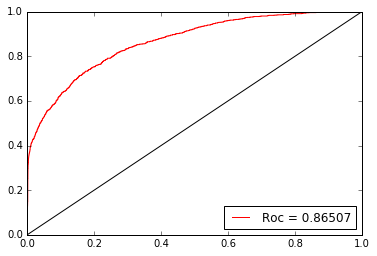

In [606]:
fpr, tpr, _ = roc_curve(db_result['FLG_DEF_6M'].tolist(),y_test1_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,color='Red',label = 'Roc = %0.5f' % roc_auc)
plt.plot([0,1],[0,1],color='black')
plt.legend (loc='lower right')
plt.show()

In [464]:
from sklearn import cross_validation

In [465]:
cross_validation.cross_val_score(model,X_train1,y_train1,cv=5,scoring='roc_auc')

array([ 0.9103241 ,  0.87932525,  0.89661981,  0.85819539,  0.79678149])

Creo un secondo training set elimando le variabili correlate:

In [611]:
db_train1.columns

Index([u'ID', u'COD_CAP', u'COD_PROVINCIA', u'DAT_COSTITUZIONE', u'COD_RAE',
       u'COD_SAE', u'COD_ISTAT_ATECO_07', u'FLG_DEF_6M', u'CBI201312_CREDITI',
       u'CBI201312_UTILE_PERDITA_ESERCIZIO', u'CBI201312_PATRIMONIO_NETTO',
       u'CBI201312_DEBITI_CONSOLIDATI', u'CBI201312_DEBITI_ENTRO_ES_SUCC',
       u'CBI201312_RICAVI_NETTI', u'CBI201312_ACQUISTI_NETTI',
       u'CBI201312_COSTI_SERVZ_BENI_TERZI', u'IMP_ACCORDATO',
       u'IMP_UTILIZZATO', u'IMP_VALORE_GARANZIA'],
      dtype='object')

In [612]:
X_train2 = db_train1.drop(['ID','COD_PROVINCIA','COD_RAE','COD_SAE','DAT_COSTITUZIONE',
                          'FLG_DEF_6M','CBI201312_DEBITI_ENTRO_ES_SUCC',
                          'CBI201312_RICAVI_NETTI','CBI201312_ACQUISTI_NETTI'],axis=1)
y_train2 = db_train1['FLG_DEF_6M']

In [614]:
X_test2 = db_test1.drop(['ID','COD_PROVINCIA','COD_RAE','COD_SAE','DAT_COSTITUZIONE',
                        'CBI201312_DEBITI_ENTRO_ES_SUCC','CBI201312_RICAVI_NETTI',
                         'CBI201312_ACQUISTI_NETTI'],axis=1)

Provo il modello sul nuovo training set:

In [615]:
model_2 = ensemble.RandomForestClassifier(n_estimators=500, max_depth=12, random_state=0)
model_2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [616]:
model_2.feature_importances_

array([ 0.0495432 ,  0.03348896,  0.04029808,  0.11701111,  0.0814384 ,
        0.04416971,  0.06276998,  0.44772994,  0.10898717,  0.01456346])

In [617]:
y_test2 = model_2.predict(X_test2)
y_test2_prob = model_2.predict_proba(X_test2)
metrics.roc_auc_score(db_result['FLG_DEF_6M'].tolist(), y_test2_prob[:,1])

0.85230752125034681

Provo un ulteriore modello:

In [618]:
from sklearn import svm

In [ ]:
model_3 = svm.SVC(kernel='linear', C=0.1)
model_3.fit(X_train1, y_train1)

In [ ]:
model_4 = svm.SVC(kernel='rbf', gamma=10., C=1.)
model_4.fit(X_train1, y_train1)

In [ ]:
gs = grid_search.GridSearchCV(model_3, {'C': np.logspace(0,2,10)}, cv=10)
gs.fit(X_train1, y_train1)
print "best params:" , gs.best_params_

Sostituisco i valori mancanti con la media:

In [ ]:
db_train2['CBI201312_CREDITI']=db_train2['CBI201312_CREDITI'].replace(np.nan,np.)
db_train1['CBI201312_UTILE_PERDITA_ESERCIZIO']=db_train1['CBI201312_UTILE_PERDITA_ESERCIZIO'].replace(np.nan,-9999)
db_train1['CBI201312_PATRIMONIO_NETTO']=db_train1['CBI201312_PATRIMONIO_NETTO'].replace(np.nan,-9999)
db_train1['CBI201312_DEBITI_CONSOLIDATI']=db_train1['CBI201312_DEBITI_CONSOLIDATI'].replace(np.nan,-9999)
db_train1['CBI201312_DEBITI_ENTRO_ES_SUCC']=db_train1['CBI201312_DEBITI_ENTRO_ES_SUCC'].replace(np.nan,-9999)
db_train1['CBI201312_RICAVI_NETTI']=db_train1['CBI201312_RICAVI_NETTI'].replace(np.nan,-9999)
db_train1['CBI201312_ACQUISTI_NETTI']=db_train1['CBI201312_ACQUISTI_NETTI'].replace(np.nan,-9999)
db_train1['CBI201312_COSTI_SERVZ_BENI_TERZI']=db_train1['CBI201312_COSTI_SERVZ_BENI_TERZI'].replace(np.nan,-9999)